# Weighted Moving Average

This notebook compute the features listed here:  
https://docs.google.com/spreadsheets/d/1Qkh-3fxaNFeh_741QCA10vgCA9-vex1RbzJa81tldwQ/edit#gid=1163800167 

FF-4	Weighted 14-day moving average

In [1]:
import talib
from talib.abstract import *
import numpy as np
import pandas as pd
import datetime as dt
import os, os.path

# 1. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
# 2. https://stackoverflow.com/questions/42379818/correct-way-to-set-new-column-in-pandas-dataframe-to-avoid-settingwithcopywarnin
pd.options.mode.chained_assignment = None # Suppress warning

# Load Data Series from Dataset

In [2]:
DATA_HOME = os.path.join("..","..","dataset","historical")

symbols = ["ADVANC","BTS"]
data = {}
for s in symbols:
    data[s] = pd.read_csv(os.path.join(DATA_HOME,"%s.csv" % s), index_col=0)

df = data["ADVANC"]
df.index = pd.to_datetime(df.index)

period_start='2014-01-01'
period_end='2014-12-31'

daily = df[period_start:period_end]
daily

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,198.5,187.0,198.0,187.0,12694200.0,137.609299
2014-01-03,196.0,186.5,187.0,196.0,16987100.0,144.232224
2014-01-06,203.0,191.0,195.0,201.0,10294700.0,147.911621
2014-01-07,210.0,200.0,205.0,210.0,11479200.0,154.534515
2014-01-08,210.0,203.0,208.0,206.0,13653100.0,151.591019
...,...,...,...,...,...,...
2014-12-24,253.0,249.0,250.0,253.0,3076400.0,196.590500
2014-12-25,252.0,246.0,251.0,248.0,1773800.0,192.705292
2014-12-26,251.0,246.0,248.0,251.0,2452700.0,195.036407


# Raw Data

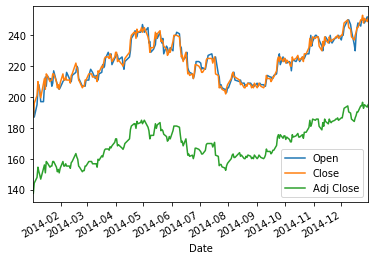

In [3]:
daily[['Open','Close','Adj Close']].plot()

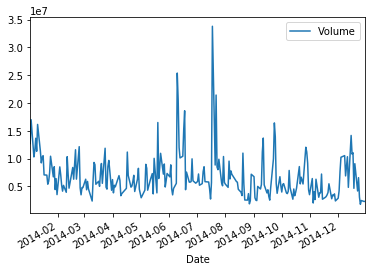

In [4]:
daily[['Volume']].plot()

# Compute Technical Indicators

# WMA

Weight average of last n-values. Use 14 days. So n=14 in [2]. n=10 in [9]

In [5]:


inputs = {
    'open': daily["Open"],
    'high': daily["High"],
    'low': daily["Low"],
    'close': daily["Close"],
    'volume': daily["Volume"]
}

# Note the use of Close instead of Adj Close.

n = 5
daily_wma = WMA(inputs, timeperiod=n)

daily.loc[:,("WMA")] = daily_wma.tolist()    
daily.head()

,High,Low,Open,Close,Volume,Adj Close,WMA
Date,,,,,,,
2014-01-02,198.5,187.0,198.0,187.0,12694200.0,137.609299,NaN
2014-01-03,196.0,186.5,187.0,196.0,16987100.0,144.232224,NaN
2014-01-06,203.0,191.0,195.0,201.0,10294700.0,147.911621,NaN
2014-01-07,210.0,200.0,205.0,210.0,11479200.0,154.534515,NaN
2014-01-08,210.0,203.0,208.0,206.0,13653100.0,151.591019,203.466667


# Plot of SMA on the original time-series

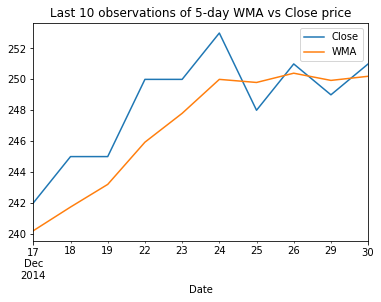

In [7]:
daily[['Close','WMA']][-10:].plot(title="Last 10 observations of 5-day WMA vs Close price")

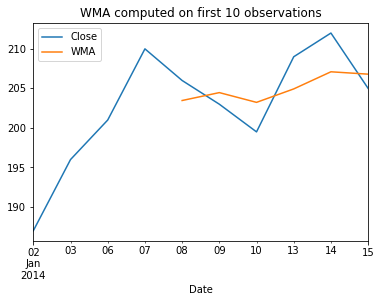

In [9]:
daily[['Close','WMA']][:10].plot(title="WMA computed on first 10 observations")